# 1. What is Normalization & Standardization and how is it helpful?

# Import Libraries


In [1]:
import pandas as pd                               # For data manipulation and analysis
import matplotlib.pyplot as plt                   # For creating visualizations
import seaborn as sns                             # For advanced and attractive statistical plots

# Load Dataset

In [3]:
df = pd.read_csv("ToyotaCorolla - MLR_7.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


###  Rename columns for consistency and readability
###  This makes the column names easier to use later in the analysis

In [4]:
df = df.rename(columns={
    "Age_08_04": "Age",
    "Fuel_Type": "FuelType",
    "cc": "CC"
})
df

,Price,Age,KM,FuelType,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#### Display summary statistics of all columns

In [5]:
df.describe()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


###  Histogram of Price
#### Helps to visualize the distribution of car prices in the dataset

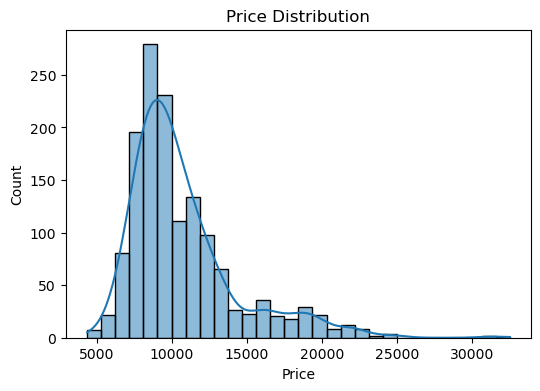

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=30, kde=True)               # KDE adds a smooth curve showing data density
plt.title("Price Distribution")
plt.show()

####  Scatter plot: Price vs Age
####  Checks how car price changes with respect to the car’s age

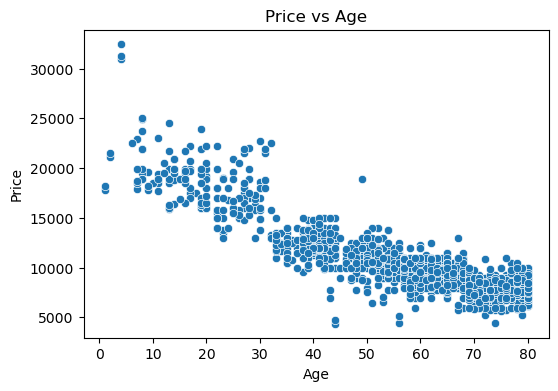

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Price", data=df)
plt.title("Price vs Age")
plt.show()


#### Scatter plot: Price vs KM
#### Checks the relationship between kilometers driven and car price

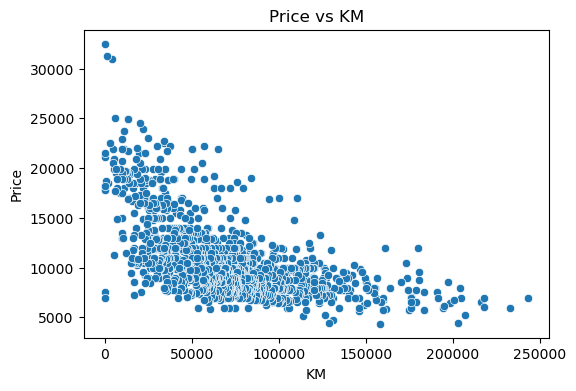

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="KM", y="Price", data=df)
plt.title("Price vs KM")
plt.show()

#### Boxplot: Price by FuelType
#### Helps compare how car prices vary among different fuel types (e.g., Petrol, Diesel, CNG)

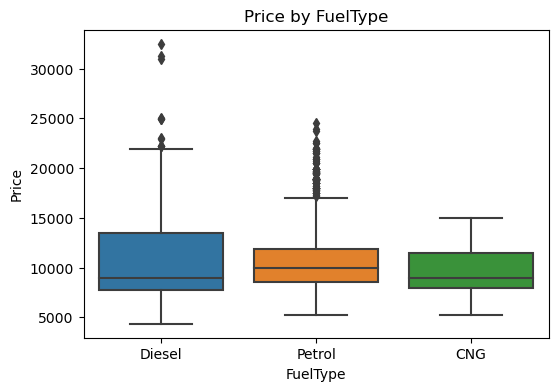

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x="FuelType", y="Price", data=df)
plt.title("Price by FuelType")
plt.show()

#   Task 2: Training and Test Split 

### Import the required function for splitting data

In [13]:
from sklearn.model_selection import train_test_split

#### Define feature matrix (X) and target vector (y)

In [14]:
# X: Independent variables (features used to predict the target)
# y: Dependent variable (target column to be predicted)
X = df[['Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'Cylinders', 'Gears']]
y = df['Price']

In [15]:
# Split the dataset into training and testing sets
# test_size=0.2 → 20% of data will be used for testing, 80% for training
# random_state=42 → ensures the split is reproducible (same random shuffle each run)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
X_train.shape

(1148, 10)

In [17]:
X_test.shape

(288, 10)

#  Task 3: Build Multiple Regression Models 

#### Import required preprocessing and modeling libraries

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

In [19]:
# -----------------------------------------------
# STEP 1: Define Preprocessing Steps
# -----------------------------------------------

# Separate numeric and categorical columns
numeric_features = ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'Cylinders', 'Gears']
categorical_features = ['FuelType']
numeric_features,categorical_features

(['Age',
  'KM',
  'HP',
  'Automatic',
  'CC',
  'Doors',
  'Weight',
  'Cylinders',
  'Gears'],
 ['FuelType'])

###  ColumnTransformer allows different preprocessing for numeric and categorical data

In [20]:
# - Numeric columns are standardized using StandardScaler (mean=0, std=1)
# - Categorical columns are encoded using OneHotEncoder (drop='first' to avoid dummy variable trap)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop="first"), categorical_features)
])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors',
                                  'Weight', 'Cylinders', 'Gears']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['FuelType'])])

In [21]:
# -----------------------------------------------
# STEP 2: Model 1 — Simple Multiple Linear Regression
# -----------------------------------------------

# Create a pipeline that combines preprocessing and the regression model
model1 = Pipeline([
    ("pre", preprocessor),        # Apply preprocessing
    ("lr", LinearRegression())    # Fit Linear Regression model
])
model1

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('lr', LinearRegression())])

###  Train (fit) the model on training data

In [23]:
model1.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('lr', LinearRegression())])

In [22]:
# -----------------------------------------------
# STEP 3: Model 2 — Linear Regression with Log-Transformed Target
# -----------------------------------------------

# Log-transform the target variable to reduce skewness and handle heteroscedasticity
# np.log1p(y) is used instead of np.log(y) to safely handle zero or near-zero values
y_train_log = np.log1p(y_train)
y_train_log

899     9.159152
881     9.189729
310     9.468928
1145    8.771990
31      9.664659
          ...   
1095    8.839422
1130    8.981053
1294    8.846641
860     9.185125
1126    8.824825
Name: Price, Length: 1148, dtype: float64

In [24]:
# Create another pipeline (same preprocessing, different target)
model2 = Pipeline([
    ("pre", preprocessor),
    ("lr", LinearRegression())
])
model2

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('lr', LinearRegression())])

In [25]:
# Train the model using the log-transformed target
model2.fit(X_train, y_train_log)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('lr', LinearRegression())])

In [26]:
# -----------------------------------------------
# STEP 4: Model 3 — Polynomial Regression (degree=2)
# -----------------------------------------------

# PolynomialFeatures adds interaction and squared terms to capture nonlinear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)

In [27]:
# Create a new preprocessor for polynomial features
preprocessor_poly = ColumnTransformer([
    ('num', Pipeline([("poly", poly), ("scale", StandardScaler())]), numeric_features),
    ('cat', OneHotEncoder(drop="first"), categorical_features)
])
preprocessor_poly

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('poly',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors',
                                  'Weight', 'Cylinders', 'Gears']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['FuelType'])])

In [28]:
# Build a pipeline for polynomial regression
model3 = Pipeline([
    ("pre", preprocessor_poly),
    ("lr", LinearRegression())
])
model3

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('lr', LinearRegression())])

# Task 4: Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [30]:
# -----------------------------------------------
# STEP 1: Make Predictions on Test Data
# -----------------------------------------------

# Model 1: Linear Regression predictions
y_pred1 = model1.predict(X_test)
y_pred1

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [31]:
# Model 2: Log-Target Regression predictions
# Apply exponential transformation to reverse log(Price)
y_pred2 = np.expm1(model2.predict(X_test))
y_pred2

array([10951.4677563 ,  8737.66727334,  8792.41671693,  8846.07486039,
        9749.42331316,  7966.85660558,  8743.36004398,  8310.52857478,
       13744.35660203, 12649.55244175,  9091.08233044,  9061.80031488,
       12474.6296471 , 12759.98389331,  9368.08732053,  8540.96968784,
       11925.45026693, 16387.82348115,  7607.3723613 ,  9027.19421789,
       12255.25180829, 18496.83881716,  7990.68169083, 10218.16882283,
        7998.31393379, 15840.55305391,  9888.0167225 ,  7579.35232648,
       15410.85215727, 14294.3123985 ,  8177.75266405,  9737.40133854,
        8523.47907814,  9696.43914193,  9845.82216577,  8079.5901569 ,
        8861.08753443,  9584.58369409, 16366.08256644,  9234.20908909,
        9512.86102438,  9235.92105682,  8060.54651807,  6657.11677116,
        7520.47541743, 17235.32955338,  9156.06869898, 10238.97914785,
        8904.14867834, 13061.38635289, 12463.05415838,  7235.92080145,
       14400.55368773, 15817.71352193,  6994.31156027,  7955.22290822,
      

In [32]:
# Model 3: Polynomial Regression predictions
model3.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('lr', LinearRegression())])

In [33]:
y_pred3 = model3.predict(X_test)
y_pred3

array([10417.92274608,  8925.67274608,  9598.36024608,  8881.54774608,
        9824.54774608,  8129.92274608,  8878.54774608,  8040.29774608,
       13674.79774608, 12755.17274608,  9507.17274608,  9070.42274608,
       12544.29774608, 12109.92274608,  9692.79774608,  8697.92274608,
       11420.42274608, 18195.92274608,  7646.92274608,  8994.54774608,
       12391.04774608, 18858.04774608,  7838.54774608,  9847.92274608,
        8268.79774608, 16395.92274608,  9970.36024608,  7632.42274608,
       15676.67274608, 14120.29774608,  8248.67274608,  9175.42274608,
        8496.04774608,  9955.04774608, 10050.29774608,  8119.17274608,
        8928.17274608,  9831.17274608, 16503.92274608,  9336.54774608,
        9603.29774608,  9328.92274608,  8021.04774608,  6539.92274608,
        7808.92274608, 18220.42274608,  9348.67274608, 10430.29774608,
        8974.42274608, 13031.42274608, 12654.42274608,  7492.92274608,
       14932.92274608, 16480.04774608,  7132.92274608,  7970.04774608,
      

In [34]:
# -----------------------------------------------
# STEP 2: Evaluate Each Model
# -----------------------------------------------

# --- Model 1: Linear Regression ---
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# --- Model 1: Linear Regression ---
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
rmse1,mae1,r2_1

(1484.265415329652, 990.8872739193968, 0.8348888040611081)

In [36]:
# --- Model 2: Log-Target Regression ---
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
rmse2,mae2,r2_2

(1257.7153735930303, 863.0008847602016, 0.8814454774408771)

In [37]:
# --- Model 3: Polynomial Regression ---
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
mae3 = mean_absolute_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
rmse3,mae3,r2_3

(1284.4329122010467, 865.4564044050053, 0.8763550914826921)

#  Task 5: Lasso and Ridge Regression 

In [38]:
# Import required classes for Lasso and Ridge Regression
from sklearn.linear_model import LassoCV, RidgeCV

In [39]:


# Generate a range of alpha values (regularization strengths)
# Using a logarithmic scale between 10^-3 and 10^3 with 50 points
alphas = np.logspace(-3, 3, 50)

In [40]:
# -------------------------------
# 🔹 LASSO REGRESSION
# -------------------------------
# Lasso (L1 regularization) shrinks some coefficients to zero
# Useful for feature selection and reducing overfitting
lasso = Pipeline([
    ("pre", preprocessor),  # Apply preprocessing (e.g., scaling, encoding)
    ("model", LassoCV(alphas=alphas, cv=5, max_iter=5000))  # LassoCV performs automatic cross-validation
])
lasso

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('model',
                 LassoCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         cv=5, max_iter=5000))])

In [41]:
# Fit the Lasso model to the training data
lasso.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('model',
                 LassoCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         cv=5, max_iter=5000))])

In [42]:
# Predict prices on the test data
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([11324.49643073,  8946.51652894,  9603.04524616,  8952.1404755 ,
       10090.58860928,  7807.04915945,  8797.10867339,  8339.16634345,
       14059.84653973, 13114.64914106,  9353.14976538,  9360.36116866,
       12937.46397193, 13092.62960752,  9752.76525825,  8341.84433101,
       12315.70575886, 17304.60273839,  7341.05656513,  9182.41663597,
       12788.15561775, 17675.1449736 ,  7910.1229174 , 10528.63236786,
        7480.5237661 , 15849.65826302,  9707.91175176,  7297.02802605,
       15418.92433504, 14505.62280704,  8162.49000887,  9916.39616337,
        8521.64792058, 10127.30999299, 10301.0149767 ,  8042.1509656 ,
        8932.20458061,  9993.37780293, 16114.86337041,  9480.03360903,
        9901.72484152,  9561.84159221,  7878.76398698,  5489.66562515,
        6875.10295492, 16890.65440455,  9465.28653533, 10661.97484459,
        8819.18325845, 13480.77645959, 13036.10684384,  6426.3536012 ,
       14644.29888445, 16043.6152125 ,  6053.13961321,  7731.43303672,
      

In [43]:
# -------------------------------
# 🔹 RIDGE REGRESSION
# -------------------------------
# Ridge (L2 regularization) shrinks coefficients but never makes them exactly zero
# Helps prevent overfitting when predictors are highly correlated
ridge = Pipeline([
    ("pre", preprocessor),  # Same preprocessing as above
    ("model", RidgeCV(alphas=alphas, cv=5))  # RidgeCV also finds the best alpha via cross-validation
])
ridge

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('model',
                 RidgeCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673...
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         cv=5))])

In [44]:
# Fit the Ridge model to the training data
ridge.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight', 'Cylinders',
                                                   'Gears']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('model',
                 RidgeCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673...
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         cv=5))])

In [45]:
# Predict prices on the test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([11224.63891225,  8983.90608676,  9421.60529148,  9077.12547886,
       10195.14653401,  8031.8628152 ,  8793.76617836,  8439.88413128,
       13922.29227415, 13086.18168558,  9500.14478298,  9412.49977051,
       12879.77555325, 12875.98693561,  9734.98220879,  8341.42725185,
       12119.38966544, 17152.98860042,  7370.24267418,  9315.60847084,
       12582.08594889, 17483.95004499,  8030.44288978, 10448.35759648,
        7559.71126992, 15815.30137588,  9959.82489622,  7336.63165167,
       15405.59145327, 14383.95559945,  8220.95125373,  9879.44267424,
        8679.23717703, 10087.98247553, 10267.87814581,  8131.21633655,
        8898.7838806 ,  9961.26371824, 16054.41319828,  9526.8719524 ,
        9902.30428939,  9574.28121906,  8061.38806226,  5507.46604238,
        6942.27909003, 16818.27656406,  9462.29837497, 10702.98987781,
        8811.80479481, 13453.37079312, 12907.5926677 ,  6537.46998721,
       14627.33236768, 16020.40074428,  6079.03507404,  7896.81971843,
      

In [46]:
# --- Model Evaluation: Lasso ---
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # sqrt of MSE gives RMSE
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso,mae_lasso,r2_lasso

(1404.5383555333613, 994.0580066847446, 0.8521502502008379)

In [47]:
# --- Model Evaluation: Ridge ---
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge,mae_ridge,r2_ridge

(1433.4321618284444, 993.0656767622697, 0.8460046256720861)